# Step 1: CIFAR-100 dataset and Visualization

This part loads the CIFAR-100 dataset and displays some sample images.

Original Data Examples:


2025-06-05 11:35:18.109346: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-06-05 11:35:18.132792: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-06-05 11:35:18.135055: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


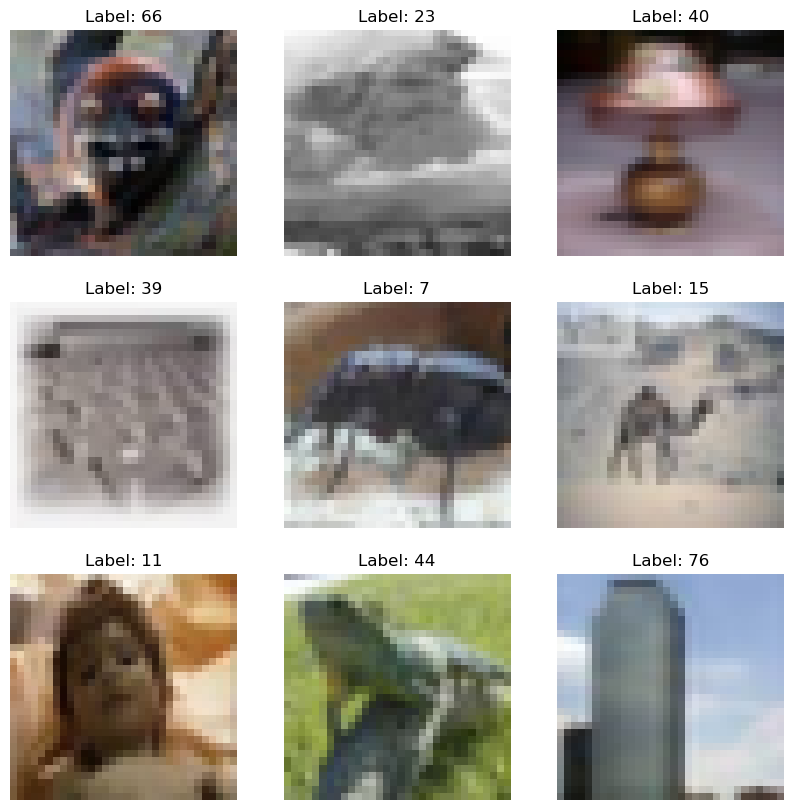

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Preprocess the data (convert to float32 and batch)
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

# Display some examples of the original data
print("Original Data Examples:")
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(1).unbatch().take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image) # CIFAR-100 images are color
    plt.title(f"Label: {label.numpy()}") # Note: Labels are coarse labels in CIFAR-100
    plt.axis('off')
plt.show()

# Step 2: A basic CNN that is being trained on the CIFAR-100 dataset

This section defines a basic CNN model and trains it on the original CIFAR-100 data. We'll adjust the input shape and the number of units in the output layer (100 for CIFAR-100).

In [2]:
# Define a simple CNN model for CIFAR-100
def build_model_cifar100():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model without data augmentation
print("\nTraining model without data augmentation (CIFAR-100)...")
model_no_aug_cifar100 = build_model_cifar100()
history_no_aug_cifar100 = model_no_aug_cifar100.fit(ds_train, epochs=10, validation_data=ds_test) # Increased epochs slightly


Training model without data augmentation (CIFAR-100)...
Epoch 1/10


/Users/sohengkhiong/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1463 - loss: 3.8053 - val_accuracy: 0.2798 - val_loss: 3.0694
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3326 - loss: 2.7785 - val_accuracy: 0.3084 - val_loss: 2.9414
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4020 - loss: 2.4495 - val_accuracy: 0.3205 - val_loss: 2.9002
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4552 - loss: 2.1868 - val_accuracy: 0.3245 - val_loss: 2.9199
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5122 - loss: 1.9515 - val_accuracy: 0.3303 - val_loss: 2.9699
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5654 - loss: 1.7373 - val_accuracy: 0.3312 - val_loss: 3.0427
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6168 - loss: 1.5410 - val_accuracy: 0.3248 - val_loss: 3.1465
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6671 - loss: 1.3615 - val_a

# Step 3: CIFAR-100 dataset being augmented and visualized

This part applies data augmentation to the CIFAR-100 images and shows examples.


Augmented Data Examples (CIFAR-100):


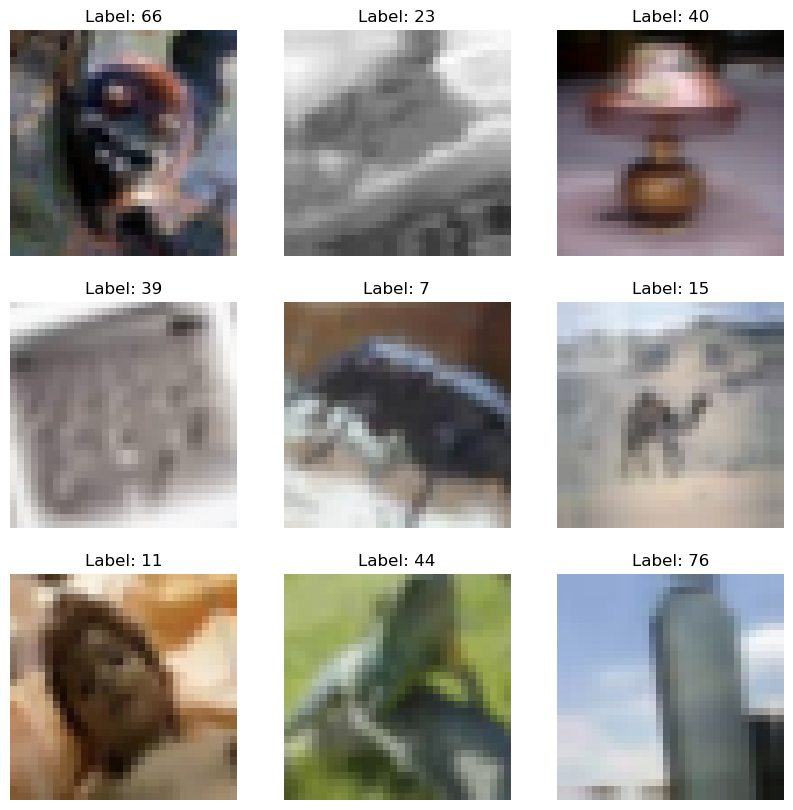

In [3]:
# Apply data augmentation
data_augmentation_cifar100 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1), # Adding some color augmentation
])

# Display some examples of augmented data
print("\nAugmented Data Examples (CIFAR-100):")
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    augmented_images = data_augmentation_cifar100(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i])
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    break # Only show one batch
plt.show()

# Create a dataset with data augmentation applied
def augment_cifar100(image, label):
    image = data_augmentation_cifar100(image)
    return image, label

ds_train_augmented_cifar100 = ds_train.map(augment_cifar100) #augmented images are being added when the model is training

# Step 4: CIFAR-100 dataset being trained (with augmentation)

This trains the same CNN model on the augmented CIFAR-100 training data.

In [4]:
# Train the model with data augmentation - more images are added dyamnically, however, the model performs way slower
print("\nTraining model with data augmentation (CIFAR-100)...")
model_with_aug_cifar100 = build_model_cifar100()
history_with_aug_cifar100 = model_with_aug_cifar100.fit(ds_train_augmented_cifar100, epochs=10, validation_data=ds_test)


Training model with data augmentation (CIFAR-100)...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1189 - loss: 3.9241 - val_accuracy: 0.2411 - val_loss: 3.2320
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2309 - loss: 3.2448 - val_accuracy: 0.2745 - val_loss: 3.0785
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2644 - loss: 3.0782 - val_accuracy: 0.2922 - val_loss: 2.9952
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2802 - loss: 2.9893 - val_accuracy: 0.2986 - val_loss: 2.9790
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2953 - loss: 2.9293 - val_accuracy: 0.3126 - val_loss: 2.9288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2991 - loss: 2.8907 - val_accuracy: 0.3139 - val_loss: 2.9104
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3100 - loss: 2.8382 - val_accuracy: 0.3152 - val_loss: 2.8985
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━

# Step 5: Compare accuracy of both models

Finally, we compare the training and validation accuracy of the two models trained on CIFAR-100.


Accuracy Comparison (CIFAR-100):
Model without augmentation:
  Training Accuracy: 0.7560
  Validation Accuracy: 0.3118

Model with augmentation:
  Training Accuracy: 0.3340
  Validation Accuracy: 0.3285


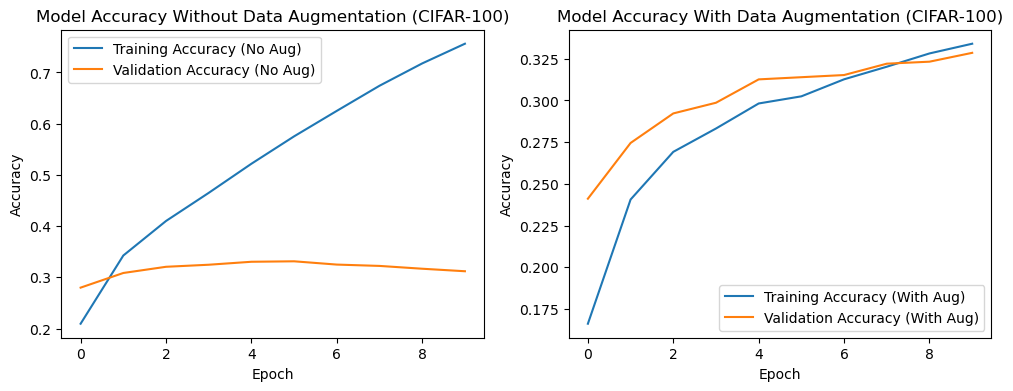

In [5]:
# Compare the accuracy
print("\nAccuracy Comparison (CIFAR-100):")
print("Model without augmentation:")
print(f"  Training Accuracy: {history_no_aug_cifar100.history['accuracy'][-1]:.4f}")
print(f"  Validation Accuracy: {history_no_aug_cifar100.history['val_accuracy'][-1]:.4f}")

print("\nModel with augmentation:")
print(f"  Training Accuracy: {history_with_aug_cifar100.history['accuracy'][-1]:.4f}")
print(f"  Validation Accuracy: {history_with_aug_cifar100.history['val_accuracy'][-1]:.4f}")

# Optionally, plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_no_aug_cifar100.history['accuracy'], label='Training Accuracy (No Aug)')
plt.plot(history_no_aug_cifar100.history['val_accuracy'], label='Validation Accuracy (No Aug)')
plt.title('Model Accuracy Without Data Augmentation (CIFAR-100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_aug_cifar100.history['accuracy'], label='Training Accuracy (With Aug)')
plt.plot(history_with_aug_cifar100.history['val_accuracy'], label='Validation Accuracy (With Aug)')
plt.title('Model Accuracy With Data Augmentation (CIFAR-100)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()